/home/xederro/.pyenv/versions/3.11.13/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
station-control-client version '9.8.0' is newer minor version than '9.4.0' used by the station control server, some new client features might not be supported.


Job ID: 946ee888-49a2-4adc-bf64-e67b6800f0d7


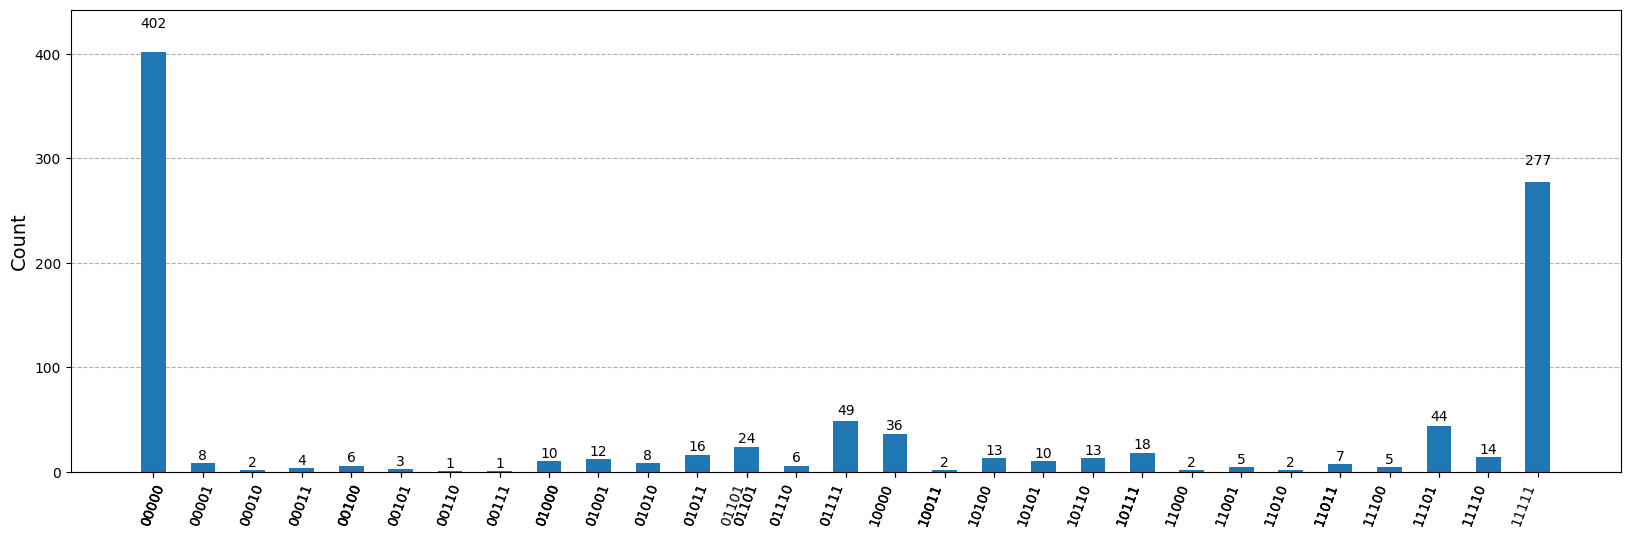

{'01111': 49, '11111': 277, '00100': 6, '10110': 13, '11101': 44, '10000': 36, '10100': 13, '00000': 402, '01101': 24, '01010': 8, '11110': 14, '01001': 12, '10111': 18, '01011': 16, '11100': 5, '10101': 10, '01000': 10, '11011': 7, '11001': 5, '00001': 8, '11010': 2, '01110': 6, '00101': 3, '00010': 2, '11000': 2, '00111': 1, '00011': 4, '00110': 1, '10011': 2}


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from iqm.qiskit_iqm import IQMProvider
import os
import matplotlib.pyplot as plt
import numpy as np

os.environ["IQM_TOKENS_FILE"] = r"/home/xederro/.cache/iqm-client-cli/tokens.json"

IQM_URL = "https://odra5.e-science.pl/station"
provider = IQMProvider(IQM_URL)
backend = provider.get_backend()
qc = QuantumCircuit(5)
qc.h(0); qc.cx(0, 1); qc.cx(0, 2); qc.cx(1, 3); qc.cx(2, 4); qc.measure_all()
tqc = transpile(qc, backend=backend)
job = backend.run(tqc, shots=1000)
print("Job ID:", job.job_id())
result = job.result()
result.get_counts()

counts = result.get_counts()

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()
print(result.get_counts())